# Assignment A2 [50 marks]

This is the second assignment for MATH08065 Computing and Numerics.

### Academic misconduct

Note that this is an **individual assignment**. Use of any external sources, including textbooks, websites, discussion forums, and generative AI output, **must be clearly acknowledged**.

- [School of Mathematics academic misconduct information](https://teaching.maths.ed.ac.uk/main/undergraduate/studies/assessment/academic-misconduct)

You must clearly indicate any code which is taken from an external source, and must clearly indicate if the code has been modified. For example

```
### Modified version of code from [author] [url] [access date]
...
### End of acknowledged code
```

Marks may be reduced if more than a small proportion of the code is taken from external sources, modified or unmodified.

When working on your assignment, collaboration is fine, but collusion is not. Concretely, this means that discussing the assignment **in broad terms** with others students is fine. However, you are **not permitted to share your working** (even partially) with other students -- that includes your code, any detailed description or explanation of code, and any results or analysis you perform. Submissions may be checked for similarity.

### Automarking

Questions 1.1, 2.1, and 2.2 will use gradescope automarking. It is important that

- Your submission consists of a single notebook, with file extension `.ipynb`.
- The indicated functions are only defined once each in your notebook.
- Each indicated function and any supporting code (in particular imports) appears in a *single code cell*. Only code in this cell will be used for testing your function. e.g. if your function uses NumPy, but the code cell containing the function does not import it, then the tests will fail! As exception, your `gamma_n` function will be available to your `gamma_n_inverse` function in 2.2.
- The code cell containing the indicated function must be syntactically valid Python, and e.g. must not use 'magic commands' (such as commands starting `%matplotlib`).
- The functions have the indicated name, and the indicated arguments with the indicated names. No additional arguments, or default argument values, should be used.

You may use NumPy, SciPy, and matplotlib for your assignment. Other libraries may not be available in the autograder.

For the complete mark scheme see `mark_scheme.pdf`.

### Submission

To submit your assignment to Gradescope:

1. Make sure you run all the cells in your `A2.ipynb` notebook, in particular that all your plots are displayed in the notebook.
2. Make sure you've pushed all your work to GitHub. (Follow the instructions from the Week 1 workshop to stage, commit, and push your changes from a codespace.)
3. If you haven't already done this for A1, go to Gradescope, and link your GitHub account by following these instructions (you'll only need to do this once): [https://guides.gradescope.com/hc/en-us/articles/21587275611533-Linking-and-Unlinking-Accounts](https://guides.gradescope.com/hc/en-us/articles/21587275611533-Linking-and-Unlinking-Accounts)
4. Select the assignment "A2" on Gradescope, and click "Submit".
5. Select your `A2` repository.
6. Then, select the `main` branch. (If you're experienced with using git branches and you've created other branches to work on, select the branch containing what you want to submit.)

Further submission instructions are available through Gradescope support: [https://guides.gradescope.com/hc/en-us/articles/21865616724749-Submitting-a-Code-assignment](https://guides.gradescope.com/hc/en-us/articles/21865616724749-Submitting-a-Code-assignment)

## Question 1: Numerical differentiation

**1.1** We consider a finite difference approximation for a first derivative of the form

$$F'(x) \approx \frac{1}{h} \sum_{i = 0}^{N - 1} \alpha_i F ( x_0 + h \beta_i ).$$

Write a function `finite_difference` which takes the following arguments.

  - A `callable` defining $F$. This function may be assumed to accept a single floating point input argument defining, say, $x$, and may be assumed to return a floating point value corresponding to $F(x)$.
  - A `float` defining $x_0$.
  - A `float` defining $h$.
  - A shape `(N,)` NumPy array with floating point data type defining $\alpha$, where the $i$th element counting from zero corresponds to $\alpha_i$.
  - A shape `(N,)` NumPy array with floating point data type defining $\beta$, where the $i$th element counting from zero corresponds to $\beta_i$.

The function `finite_difference` should return the finite difference approximation for the first derivative at $x_0$ defined using the formula above, as a `float`.

After your function definition add code which checks your function behaves correctly for some simple cases. Your verification code should be clear, easy to understand, commented as necessary, and should display a small amount of relevant output.

The function must have the form

```
def finite_difference(F, x_0, h, alpha, beta):
    ...
    return derivative_approximation
```

**[5 marks]**

In [2]:
import numpy as np

def finite_difference(F, x_0, h, alpha, beta):
    """
    calculates the finite difference approximation using the formula provided
    """
    derivative_approximation = 1/h * np.sum(alpha * F(x_0 + h * beta)) # calls the "testing_function" function with the values x_0 + h*beta as input
    return derivative_approximation

# initialising our test functions
def test_function_1(x):
    """Function 1 to test our code"""
    return x

def test_function_2(x):
    """Function 2 to test our code"""
    return 3*x ** 2 + 8*x - 1

def test_function_3(x):
    """Function 3 to test our code"""
    return -2*x ** 2 + 2*x + 16

def test_function_4(x):
    """Function 4 to test our code"""
    return x ** 14 - x ** 8 - 6*x ** 4 + 24*x
    

def test_function_5(x):
    """Function 5 to test our code"""
    return np.e ** x

def test_function_6(x):
    """Function 6 to test our code"""
    return np.sin(x)

def test_function_7(x):
    """Function 7 to test our code"""
    return np.log(np.sin(x)+2)

# testing all the functions with different h values to ensure that there is no errors in the functions themselves
for N in range(1, 8):
    alpha = np.array([-1, 1]) # an alpha and beta value suitable for x^0 and x^1 terms for correct differentiations
    beta = np.array([0, 1])
    match N:
        case 1:
            x_0 = 1
            h = 1
            print(finite_difference(test_function_1, x_0, h, alpha, beta))
        case 2:
            x_0 = 10
            h = 7
            print(finite_difference(test_function_2, x_0, h, alpha, beta))
        case 3:
            x_0 = 3
            h = 65
            print(finite_difference(test_function_3, x_0, h, alpha, beta))
        case 4:
            x_0 = 84
            h = 0.02
            print(finite_difference(test_function_4, x_0, h, alpha, beta))
        case 5:
            x_0 = 42
            h = 4
            print(finite_difference(test_function_5, x_0, h, alpha, beta))
        case 6:
            x_0 = -4
            h = 0.2
            print(finite_difference(test_function_6, x_0, h, alpha, beta))
        case 7:
            x_0 = 4
            h = 7
            print(finite_difference(test_function_7, x_0, h, alpha, beta))
    

1.0
89.0
-140.0
1.453553418621438e+26
2.330547981612594e+19
-0.7247230218260464
-0.031096700008938393


**1.2** Consider $N = 3$, let

$$\beta = \left( \begin{array}{c} -2 \\ -1 \\ 0 \end{array} \right),$$

and let $\alpha$ be defined by

$$\alpha = \left( \begin{array}{ccc} 0 & 0 & 1 \end{array} \right) M^{-1} A$$

where $M$ and $A$ are $3 \times 3$ matrices defined by

$$M = \frac{1}{15} \left( \begin{array}{ccc} 4 & 2 & -1 \\ 2 & 16 & 2 \\ -1 & 2 & 4 \end{array} \right),$$
$$A = \frac{1}{6} \left( \begin{array}{ccc} -3 & 4 & -1 \\ -4 & 0 & 4 \\ 1 & -4 & 3 \end{array} \right).$$

Investigate the accuracy of the finite difference approximation. Summarize your results in a discussion of no more than $350$ words.

Your code should be clear, easy to understand, and commented as necessary. Your code should generate at least one plot. You should choose which output and/or plots your code should generate, and should use the output and/or plots to support your discussion. Plots must be well laid out and clearly labelled.

**[7 marks]**

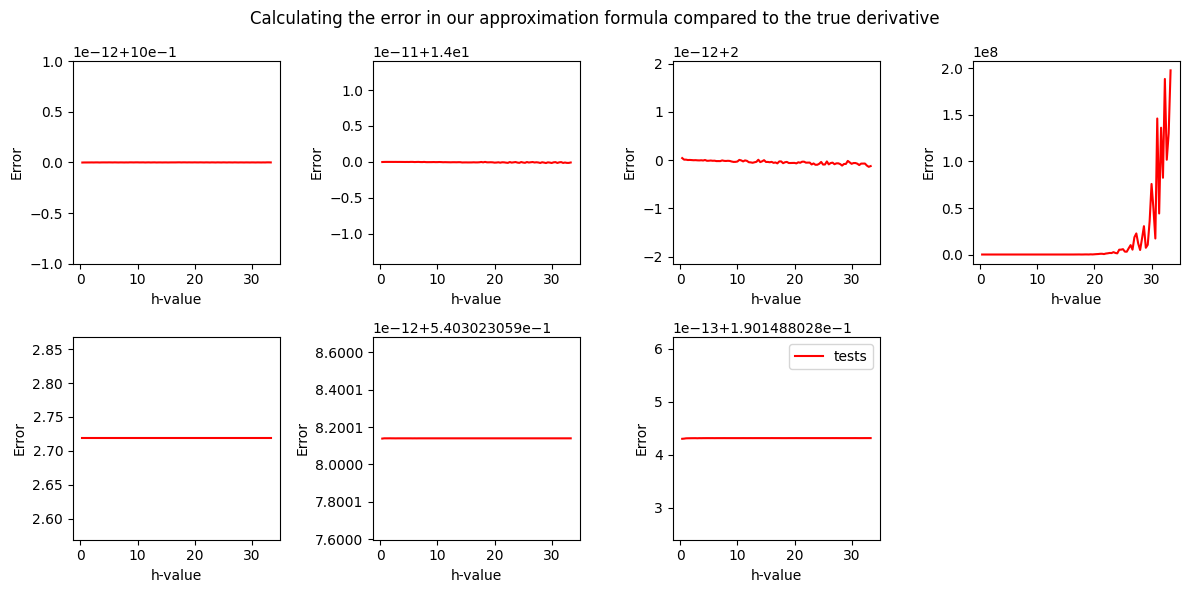

In [ ]:
# Add code here
import numpy as np
import matplotlib.pyplot as plt

# initialising our provided values
M = 1/15 * np.array([[4, 2, -1], [2, 16, 2], [-1, 2, 4]])
A = 1/6 * np.array([[-3, 4, -1], [-4, 0, 4], [1, -4, 3]])
beta = np.array([[-2], [-1], [0]])
alpha = np.matmul(np.matmul(np.array([[0,0,1]]), np.linalg.inv(M)), A) 

# our functions correctly differentiated used for finding the error 
def true_function_1(x):
    """Function 1 to truth our code"""
    return 1
def true_function_2(x):
    """Function 2 to truth our code"""
    return 6*x + 8
def true_function_3(x):
    """Function 3 to truth our code"""
    return -4*x + 2
def true_function_4(x):
    """Function 4 to truth our code"""
    return 14*x**13 - 8*x**7 - 24*x**3 + 24
def true_function_5(x):
    """Function 5 to truth our code"""
    return np.e ** x
def true_function_6(x):
    """Function 6 to truth our code"""
    return np.cos(x)
def true_function_7(x):
    """Function 7 to truth our code"""
    return np.cos(x)/(np.sin(x)+2)

x_0 = 1

# an arrangement of empty lists for fulling with our errors
errorVals1 = []
errorVals2 = []
errorVals3 = []
errorVals4 = []
errorVals5 = []
errorVals6 = []
errorVals7 = []

# an arrangement of 100 entries long lists filled with the correct differentiation of their respective functions
trueVals1 = [true_function_1(x_0)]*100
trueVals2 = [true_function_2(x_0)]*100
trueVals3 = [true_function_3(x_0)]*100
trueVals4 = [true_function_4(x_0)]*100
trueVals5 = [true_function_5(x_0)]*100
trueVals6 = [true_function_6(x_0)]*100
trueVals7 = [true_function_7(x_0)]*100
hVals = []

# adding the error values to their lists with differing h
for h in range(1,101):
    q = h/3 # making h into a nicer range
    hVals.append(q)    
    errorVals1.append(abs(trueVals1[h-1] - finite_difference(test_function_1, x_0, q, alpha, beta)))
    errorVals2.append(abs(trueVals2[h-1] - finite_difference(test_function_2, x_0, q, alpha, beta)))
    errorVals3.append(abs(trueVals3[h-1] - finite_difference(test_function_3, x_0, q, alpha, beta)))
    errorVals4.append(abs(trueVals4[h-1] - finite_difference(test_function_4, x_0, q, alpha, beta)))
    errorVals5.append(abs(trueVals5[h-1] - finite_difference(test_function_5, x_0, q, alpha, beta)))
    errorVals6.append(abs(trueVals6[h-1] - finite_difference(test_function_6, x_0, q, alpha, beta)))
    errorVals7.append(abs(trueVals7[h-1] - finite_difference(test_function_7, x_0, q, alpha, beta)))


# plotting all our graphs
fig, ax = plt.subplots(2, 4, figsize=(12, 6))

ax[0, 0].plot(hVals, errorVals1, color="r")
ax[0, 1].plot(hVals, errorVals2, color="r")
ax[0, 2].plot(hVals, errorVals3, color="r")
ax[0, 3].plot(hVals, errorVals4, color="r")
ax[1, 0].plot(hVals, errorVals5, color="r")
ax[1, 1].plot(hVals, errorVals6, color="r")
ax[1, 2].plot(hVals, errorVals7, color="r")
fig.delaxes(ax[1, 3])
for i in range(2):
    for j in range(4):
        ax[i, j].set_xlabel("h-value")
        ax[i, j].set_ylabel("Error")



fig.suptitle("Calculating the error in our approximation formula compared to the true derivative")

plt.legend()
plt.tight_layout()
plt.show()


## Discussion

When dealing with a simple polynomial, one with low order, the accuracy is very good, with it consistently being very low error. For these, and partially the third formula too, you can see that the approximation is quite accurate with the provided alpha and beta values, suggesting they can handle polynomials of order 2. In our third equation, we can see the error getting less consistent at h=30, but for the most part, remaining quite constant still. In our fourth graph with a very large polynomial, we can see the higher the h-value, the far worse the approximation is and the far larger the error. In our non-polynomial graphs, although the error is constant, it's constant somewhere other than zero. In graph 5, we can see that the graph is constant at e, which would suggest there is an error in the code when dealing with exponentials, since that is the value at x=1, which would suggest the approximation formula comes out to be 0. From testing so we can see that our polynomial functions are relatively accurate estimates for low h, but tend to taper off at higher h, and our non-polynomial functions have a consistent error, but that error is not at 0.

## Question 2: Function inverse

For each non-negative integer $n$ we define a function $\gamma_n : \mathbb{R} \rightarrow \mathbb{R}$ where

$$\gamma_n ( x ) = \begin{cases} \frac{1}{(n + 1)!} & \text{if} ~ x = 0 \\
                                 \frac{e^x - \sum_{k = 0}^n \frac{1}{k!} x^k}{x^{n + 1}} & \text{otherwise} \end{cases}.$$

**2.1** Write a function named `gamma_n` which takes as input two arguments named `n` and `x`, defining $n$ and $x$ respectively, where $x \ge 0$, and which returns the result of $\gamma_n ( x )$. You may assume that `n` is an `int` and that `x` is a non-negative `float`.

The function must have the form

```
def gamma_n(n, x):
    ...
    return y
```

Autograder tests will consider up to $n = 6$.

**[4 marks]**

In [13]:
import numpy as np
import scipy

def gamma_n(n, x):
    """
    computes the value of y using the function provided
    """
    if x == 0: 
        y = 1/scipy.special.factorial(n+1) #finding the simple factorial when x=0
    elif x > 500:
        return print(f"Cannot compute, e**{x} is too large.")
    else:
        summation = 0
        for k in range(n+1): # computing our summation serparate to y, to be put on afterwards
            summation += x**k /scipy.special.factorial(k)
        y = (np.e**x-summation)/x**(n+1) # combining the summation with the rest of the equation to find y

    return y

**2.2** Write a function named `gamma_n_inverse` which takes as input two arguments named `n` and `y`, defining $n$ and $y$ respectively, where $y \ge \gamma_n (0)$, and which returns a value $x$ such that $\gamma_n ( x ) = y$. You may assume that `n` is an `int` and that `y` is a `float`.

In a discussion of not more than $400$ words explain and justify any decisions made in your code.

The function must have the form

```
def gamma_n_inverse(n, y):
    ...
    return x
```

Autograder tests will consider up to $n = 6$.

Your `gamma_n` function defined above will be available to your `gamma_n_inverse` function defined here, when run in the autograder. However you should define all other necessary objects, and in particular import any required modules, in the code cell in which `gamma_n_inverse` is defined.

**[8 marks]**

In [14]:
def gamma_n_inverse(n, y):
    """
    finds the inverse of the function prior
    """
    if (1/y).is_integer(): # since we have e in the x != 0 case, then it cannot equal 0, until large enough n where the summation approximates to e, however at that point, the answer will be 0 regardless
        x = 0
    else: # because our summation is the taylor expansion for e^x, we can just subtract the terms greater than n
        a = 0
        b = 1000

        while True:
            c = (a + b) / 2 # 
            if abs(b - a) < 1e-10: # if we are close enough to our a correct value, return the correct value
                return round(c, 10)
            if (gamma_n(n, a) - y) * (gamma_n(n, c) - y) <= 0: # decides which half of the range to shrink
                b = c
            else:
                a = c

## Discussion
For the gamma_n formula, the first thing I made sure to do, was sort out the x = 0 case, which is a simple factorial which we can just return. As for the second, i trialed a couple different ways to calculate the summation, however ended up using a for loop to cycle through, as we would calculate by hand, as it felt the easiest and most intuitive, then have the summation plugged intot he formula as a value and returning y then. In testing, I found that if x is greater than 500, python can no longer handle the equation, so I added a fail safe to prevent confusion as to why it's breaking. As for the inverse function, I similarly took care of the x = 0 case first, which I know from before, if x != 0, then there is an e added to the equation, so it can never be an integer, and if x = 0, it's always 1/k where k is an integer, so it's easy to test for that. As for the rest of the cases, we calculate to see if a correct value falls in between the range, and if it does, we shrink the range, and check again. We repeat this until we get within a chosen tolerance, in this case 1e-10, at which point we consider our value correct, and round x to 10 decimal places, which is usually enough to keep accuracy, but also round it to a whole number if applicable. In testing this, I would provide the first formula with an x and n value, then get that to output a y value, which i then use to test the inverse formula with, along with the same n. This would consistently output the same x value as I inputted, with the only exception being the previously stated fail safe coming in, for when x is greater than 500, but as far as I'm aware, there's no way properly around that. 

## Question 3: Numerical differential equations

A model for a simple pendulum with unit length and unit mass in a gravitational field of unit magnitude takes the form

$$\frac{d^2 \theta}{d t^2} = -\sin \theta \qquad t > 0,$$

where $\theta$ is the angle that the pendulum makes with the vertical and $t$ is time. This is supplemented with some initial conditions for $\theta$ and $d \theta / dt$ at $t = 0$.

We write this in the form

$$\frac{d u}{d t} = F(u) \qquad t > 0,$$

where

$$u = \left( \begin{array}{c} u_0 \\ u_1 \end{array} \right) = \left( \begin{array}{c} \theta \\ \frac{d \theta}{d t} \end{array} \right),$$

$$F(u) = \left( \begin{array}{c} u_1 \\ -\sin u_0 \end{array} \right).$$

Note that it follows that

$$\frac{d E}{d t} = 0,$$

where $E$ is the energy of the pendulum,

$$E = \frac{1}{2} u_1 u_1 + 1 - \cos u_0.$$

Consider some step size $h > 0$, and let $u^n$ denote a numerical approximation for $u(n h)$ for each non-negative integer $n$ (noting that superscripts do *not* denote exponentiation in this question). Throughout this question we consider the discrete initial condition

$$u^0 = \left( \begin{array}{c} \frac{4}{5} \pi \\ 0 \end{array} \right).$$

**3.1** We seek an approximate discrete solution via

$$\frac{d u}{d t} \rightarrow \frac{1}{h} \left( u^{n + 1} - u^n \right),$$
$$F(u) \rightarrow F(u^n) = \left( \begin{array}{c} u_1^n \\ -\sin u_0^n \end{array} \right),$$

leading to the discrete system

$$\frac{1}{h} \left( u^{n + 1} - u^n \right) = \left( \begin{array}{c} u_1^n \\ -\sin u_0^n \end{array} \right) \qquad n = 0, 1, 2, \ldots.$$

This is known as the *forward Euler* discretization. Investigate the behaviour of the discrete solution. Add a discussion which describes and justifies any decisions you make in your investigation, and which summarizes your results. Your discussion should be no more than $350$ words.

Your code should be clear, easy to understand, and commented as necessary. Your code should generate at least one plot. You should choose which output and/or plots your code should generate, and should use the output and/or plots to support your discussion. Plots must be well laid out and clearly labelled.

**[6 marks]**

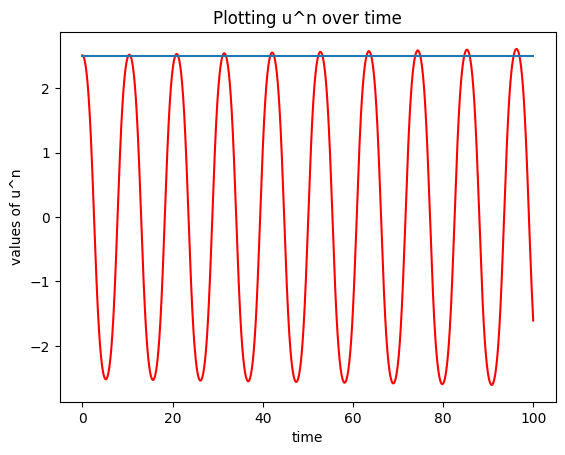

In [ ]:
import numpy as np
# Add code here
h = 0.001
n = 100000

# function for calculating next step
def functionU(vector):
    return (np.array([vector[1], -np.sin(vector[0])]) * h + vector)

#initialising variables
uNList = np.zeros([n, 2])
u0 = np.array([4*np.pi/5, 0])
uNList[0] = u0

# calculates our u values up to n 
for i in range(1, n):
    uNList[i] = functionU(uNList[i-1])

# calculates our time step for plotting
t = np.arange(n)*h

# plots our graphs
plt.plot(t, uNList[:, 0], color="r")
plt.plot([0, 100], [2.5, 2.5])
plt.xlabel("time")
plt.ylabel("values of u^n")
plt.title("Plotting u^n over time for the Forward Euler discretization")

plt.show()


## Discussion
I decided to use a very low h value as it shows a nicer sine wave, which can be seen increasing overtime when looked at in reference to the horizontal line, this would likely continue on for longer, but due to processing power I can't test that. I use a function to calculate the next values using the formula provided in a simple for loop. I rearranged the formula proved to calculate what would need to be put in to the formula. We can see that the graph is oscillating around 0 at first as well, although it is increasing over time.

**3.2** We next seek an approximate discrete solution via

$$\frac{d u}{d t} \rightarrow \frac{1}{h} \left( u^{n + 1} - u^n \right),$$
$$F(u) \rightarrow \left( \begin{array}{c} u_1^{n + 1} \\ -\sin u_0^n \end{array} \right),$$

leading to the discrete system

$$\frac{1}{h} \left( u^{n + 1} - u^n \right) = \left( \begin{array}{c} u_1^{n + 1} \\ -\sin u_0^n \end{array} \right) \qquad n = 0, 1, 2, \ldots.$$

This is a type of *semi-implicit Euler* discretization. Investigate the behaviour of the discrete solution. Add a discussion which describes and justifies any decisions you make in your investigation, and which summarizes your results. Your discussion should be no more than $350$ words.

Your code should be clear, easy to understand, and commented as necessary. Your code should generate at least one plot. You should choose which output and/or plots your code should generate, and should use the output and/or plots to support your discussion. Plots must be well laid out and clearly labelled.

**[6 marks]**

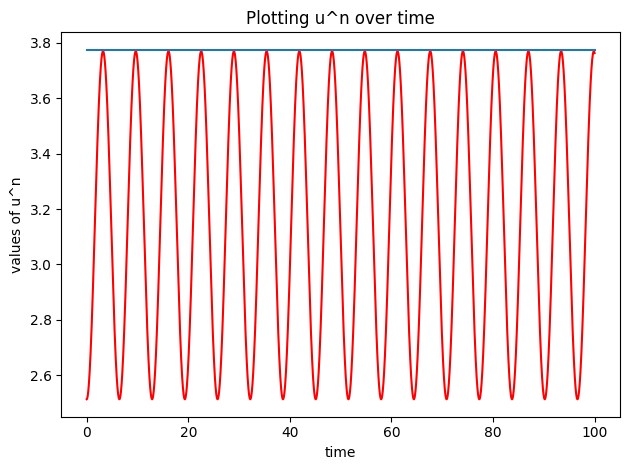

1.256343168809771


In [ ]:
# Add code here
import numpy as np
# Add code here
h=0.001
n = 100000

uNList = np.zeros([n, 2])
u0 = np.array([4*np.pi/5, 0])
uNList[0] = u0

for i in range(1, n):
    nextN = [0, 0]
    nextN[1] = uNList[i-1, 1] - h * np.sin(uNList[i-1, 0])
    nextN[0] = uNList[i-1, 0] - h * nextN[1]
    
    uNList[i] = nextN

t = np.arange(n)*h

plt.plot(t, uNList[:, 0], color="r")
plt.plot([0, 100], [3.775, 3.775])
plt.xlabel("time")
plt.ylabel("values of u^n")
plt.title("Plotting u^n over time for the Semi-Implicit Euler discretization")

plt.tight_layout()
plt.show()


## Discussion

The very start of the code is much the same as 3.1, however rearranging was not as easy in this one, so it has to be done it two separate parts, since u need u_1 to calculate u_0. I've added a horizontal line here to test if this one is also increasing over time as the last one was, however it appears not to be. Also, not ocilating over 0, but instead around pi, and since it's not increasing over time, will oscillate around pi seemingly forever.

**3.3** We finally seek an approximate discrete solution via

$$\frac{d u}{d t} \rightarrow \frac{1}{h} \left( u^{n + 1} - u^n \right),$$
$$F(u) \rightarrow F(u^{n + 1}) = \left( \begin{array}{c} u_1^{n + 1} \\ -\sin u_0^{n + 1} \end{array} \right),$$

leading to the discrete system

$$\frac{1}{h} \left( u^{n + 1} - u^n \right) = \left( \begin{array}{c} u_1^{n + 1} \\ -\sin u_0^{n + 1} \end{array} \right) \qquad n = 0, 1, 2, \ldots.$$

This is known as the *backward Euler* discretization. Investigate the behaviour of the discrete solution. Add a discussion which describes and justifies any decisions you make in your investigation, and which summarizes your results. Your discussion should be no more than $350$ words.

**[9 marks]**

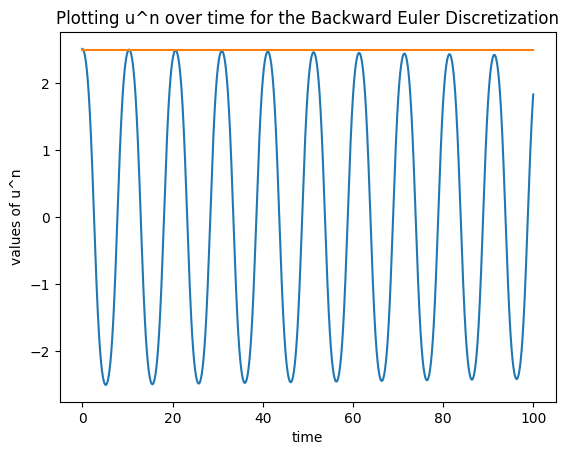

In [62]:

import numpy as np
import scipy.optimize as sci 

def functionU(vector):
    return np.array([vector[1], -np.sin(vector[0])])

h=0.001
n = 100000

uNList = np.zeros((2, n + 1))
u0 = np.array([4*np.pi/5, 0])
uNList[:, 0] = u0

for i in range(n):
    uNList[:, i + 1] = sci.fsolve(lambda nextN: nextN - uNList[:, i] - h * functionU(nextN), uNList[:, i])

t = np.arange(n + 1)*h

plt.plot(t, uNList[0])
plt.plot([0, 100], [2.5, 2.5])
plt.xlabel("time")
plt.ylabel("values of u^n")
plt.title("Plotting u^n over time for the Backward Euler Discretization")
plt.show()

## Discussion

In 3.3, we're back to being more similar to 3.1. Our graph is oscillating around 0 again, and this time is slowly decreasing, as shown by the horizontal line. The line is again at 2.25, which is the same as 3.1, which shows how similar these two are. For this equation I used fsolve from scipy, as it was the easiest way of finding an unknown variable. I considered using a similar approach to 2.2, and using bisections, however opted for this approach instead since it seemed easier and just as effective. Excluding the calculating the next steps, the code is very similar to both 3.1 and 3.2.

**3.4** Which of the methods, considered in 3.1--3.3, would you use for this problem? Justify your answer. Your answer and justification should not exceed $250$ words, and may refer to your plots and discussions in your solutions to 3.1--3.3.

**[5 marks]**

## Discussion

Since 3.2 remains oscillating round the same point without slowly drifting, I believe that method is the most effective. The fact that both 3.1 and 3.3 oscillate around 0 could suggest that it is in fact 3.2 which is wildly wrong, but I believe it would make sense for the 3.1, being the forward Euler discretization, to increase over time, and similarly with 3.3 being the backward Euler discretization, to decrease over time. I find the way the next u^n is calculated to be very intuitive for 3.2 as well, and especially since it's constantly working around sin and cos, yet still remains around pi would suggest to me the permanence of that, so regardless of how large an N you feed it, it will always give you a suitable, correct answer.